In [29]:
%pip install --upgrade pip
%pip install plotly
%pip install sklearn
%pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [57]:
import  pandas              as      pd
import  numpy               as      np
import  plotly.express      as      px
import  seaborn             as      sns
import  matplotlib.pyplot   as      plt
from    plotly.express      import  box
from    graficos            import  heatmap_corr, plot_countplot
from    IPython.display     import  IFrame
%matplotlib inline 

In [31]:
url = 'https://github.com/sthemonica/alura-voz/blob/main/Dados/Telco-Customer-Churn.json?raw=true'
df = pd.read_json(url)

In [32]:
df_json = pd.read_json(
    path_or_buf = url,
    orient = 'columns'
)
df_json

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

In [33]:
df = df_json.iloc[:,:2].copy()
for coluna in range(2,6):
  df = pd.concat([df, pd.json_normalize(df_json.iloc[:,coluna])], axis = 1)

In [34]:
df.head().T

0               1                 2  \
customerID          0002-ORFBO      0003-MKNFE        0004-TLHLJ   
Churn                       No              No               Yes   
gender                  Female            Male              Male   
SeniorCitizen                0               0                 0   
Partner                    Yes              No                No   
Dependents                 Yes              No                No   
tenure                       9               9                 4   
PhoneService               Yes             Yes               Yes   
MultipleLines               No             Yes                No   
InternetService            DSL             DSL       Fiber optic   
OnlineSecurity              No              No                No   
OnlineBackup               Yes              No                No   
DeviceProtection            No              No               Yes   
TechSupport                Yes              No                No   
StreamingTV                Yes              No                No   
StreamingMovies             No             Yes                No   
Contract              One year  Month-to-month    Month-to-month   
PaperlessBilling           Yes              No               Yes   
PaymentMethod     Mailed check    Mailed check  Electronic check   
Charges.Monthly           65.6            59.9              73.9   
Charges.Total            593.3           542.4            280.85   

                                 3               4  
customerID              0011-IGKFF      0013-EXCHZ  
Churn                          Yes             Yes  
gender                        Male          Female  
SeniorCitizen                    1               1  
Partner                        Yes             Yes  
Dependents                      No              No  
tenure                          13               3  
PhoneService                   Yes             Yes  
MultipleLines                   No              No  
InternetService        Fiber optic     Fiber optic  
OnlineSecurity                  No              No  
OnlineBackup                   Yes              No  
DeviceProtection               Yes              No  
TechSupport                     No             Yes  
StreamingTV                    Yes             Yes  
StreamingMovies                Yes              No  
Contract            Month-to-month  Month-to-month  
PaperlessBilling               Yes             Yes  
PaymentMethod     Electronic check    Mailed check  
Charges.Monthly               98.0            83.9  
Charges.Total              1237.85           267.4

Dicionário de dados
- customerID: número de identificação único de cada cliente
- Churn: se o cliente deixou ou não a empresa
- gender: gênero (masculino e feminino)
- SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- Partner: se o cliente possui ou não um parceiro ou parceira
- Dependents: se o cliente possui ou não dependentes
- tenure: meses de contrato do cliente
- PhoneService: assinatura de serviço telefônico
- MultipleLines: assisnatura de mais de uma linha de telefone
- InternetService: assinatura de um provedor internet
- OnlineSecurity: assinatura adicional de segurança online
- OnlineBackup: assinatura adicional de backup online
- DeviceProtection: assinatura adicional de proteção no dispositivo
- TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
- StreamingTV: assinatura de TV a cabo
- StreamingMovies: assinatura de streaming de filmes
- Contract: tipo de contrato
- PaperlessBilling: se o cliente prefere receber online a fatura
- PaymentMethod: forma de pagamento
- Charges.Monthly: total de todos os serviços do cliente por mês
- Charges.Total: total gasto pelo cliente

In [35]:
df.shape[0] - df['customerID'].shape[0]

0

temos 224 entradas sem resposta sobre o cliente haver cancelado ou não, por ser somente 3%, vamos remover essas entradas.

In [36]:
df.Churn.value_counts() / df.shape[0] * 100

No     71.198569
Yes    25.719004
        3.082427
Name: Churn, dtype: float64

In [37]:
df = df[df.Churn != ''].reset_index(drop = True)
df

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7038  9987-LUTYD    No  Female              0      No         No      13   
7039  9992-RRAMN   Yes    Male              0     Yes         No      22   
7040  9992-UJOEL    No    Male              0      No         No       2   
7041  9993-LHIEB    No    Male              0     Yes        Yes      67   
7042  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             Yes                No             DSL  ...          Yes   
1             Yes               Yes             DSL  ...           No   
2             Yes                No     Fiber optic  ...           No   
3             Yes                No     Fiber optic  ...          Yes   
4             Yes                No     Fiber optic  ...           No   
...           ...               ...             ...  ...          ...   
7038          Yes                No             DSL  ...           No   
7039          Yes               Yes     Fiber optic  ...           No   
7040          Yes                No             DSL  ...          Yes   
7041          Yes                No             DSL  ...           No   
7042           No  No phone service             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038               No         Yes          No              No        One year   
7039               No          No          No             Yes  Month-to-month   
7040               No          No          No              No  Month-to-month   
7041              Yes         Yes          No             Yes        Two year   
7042              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 Yes      Mailed check           65.60          593.3  
1                  No      Mailed check           59.90          542.4  
2                 Yes  Electronic check           73.90         280.85  
3                 Yes  Electronic check           98.00        1237.85  
4                 Yes      Mailed check           83.90          267.4  
...               ...               ...             ...            ...  
7038               No      Mailed check           55.15          742.9  
7039              Yes  Electronic check           85.10         1873.7  
7040              Yes      Mailed check           50.30          92.75  
7041               No      Mailed check           67.85        4627.65  
7042               No  Electronic check           59.00         3707.6  

[7043 rows x 21 columns]

In [38]:
def plot_hist(coluna):
  display(coluna.value_counts())
  fig = px.histogram(x = coluna, title = f'Coluna: {coluna.name}', width=800, height=400)
  fig.show()

a coluna gender está com entradas coerentes e bem distribuidas entre masculino e feminino

In [39]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Challenge Profiling Report")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
df.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

Após tentar converter a coluna Charges.Total para tipo float retornou erro, foi localizada uma entrada em branco " ", dessa forma vamos localizar os index.

In [41]:
charges_total_em_branco = list(df['Charges.Total'][[' ' in i for i in df['Charges.Total']]].index)
charges_total_em_branco

[945, 1731, 1906, 2025, 2176, 2250, 2855, 3052, 3118, 4054, 5433]

temos que há uma relação com o valor mensal

In [42]:
df.iloc[charges_total_em_branco].T

945                  1731  \
customerID                     1371-DWPAZ           2520-SGTTA   
Churn                                  No                   No   
gender                             Female               Female   
SeniorCitizen                           0                    0   
Partner                               Yes                  Yes   
Dependents                            Yes                  Yes   
tenure                                  0                    0   
PhoneService                           No                  Yes   
MultipleLines            No phone service                   No   
InternetService                       DSL                   No   
OnlineSecurity                        Yes  No internet service   
OnlineBackup                          Yes  No internet service   
DeviceProtection                      Yes  No internet service   
TechSupport                           Yes  No internet service   
StreamingTV                           Yes  No internet service   
StreamingMovies                        No  No internet service   
Contract                         Two year             Two year   
PaperlessBilling                       No                   No   
PaymentMethod     Credit card (automatic)         Mailed check   
Charges.Monthly                     56.05                 20.0   
Charges.Total                                                    

                                       1906                 2025  \
customerID                       2775-SEFEE           2923-ARZLG   
Churn                                    No                   No   
gender                                 Male                 Male   
SeniorCitizen                             0                    0   
Partner                                  No                  Yes   
Dependents                              Yes                  Yes   
tenure                                    0                    0   
PhoneService                            Yes                  Yes   
MultipleLines                           Yes                   No   
InternetService                         DSL                   No   
OnlineSecurity                          Yes  No internet service   
OnlineBackup                            Yes  No internet service   
DeviceProtection                         No  No internet service   
TechSupport                             Yes  No internet service   
StreamingTV                              No  No internet service   
StreamingMovies                          No  No internet service   
Contract                           Two year             One year   
PaperlessBilling                        Yes                  Yes   
PaymentMethod     Bank transfer (automatic)         Mailed check   
Charges.Monthly                        61.9                 19.7   
Charges.Total                                                      

                                 2176                 2250          2855  \
customerID                 3115-CZMZD           3213-VVOLG    4075-WKNIU   
Churn                              No                   No            No   
gender                           Male                 Male        Female   
SeniorCitizen                       0                    0             0   
Partner                            No                  Yes           Yes   
Dependents                        Yes                  Yes           Yes   
tenure                              0                    0             0   
PhoneService                      Yes                  Yes           Yes   
MultipleLines                      No                  Yes           Yes   
InternetService                    No                   No           DSL   
OnlineSecurity    No internet service  No internet service            No   
OnlineBackup      No internet service  No internet service           Yes   
DeviceProtection  No internet service  No internet service           Yes   
TechSupport       No in

Como essas entradas apresentam meses de contrato igual a zero podemos considerar de que cancelaram no primeiro mês, vamos preencher o valor total como o valor mensal.

In [43]:
df.iloc[charges_total_em_branco,-1] = df.iloc[charges_total_em_branco,-2]
df.iloc[charges_total_em_branco,-1]

945     56.05
1731     20.0
1906     61.9
2025     19.7
2176    20.25
2250    25.35
2855    73.35
3052    25.75
3118    52.55
4054    80.85
5433    19.85
Name: Charges.Total, dtype: object

In [44]:
df = df.astype({'Charges.Total':'float'})

In [45]:
df.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object

In [46]:
novas_colunas = [
    'clienteID',
    'encerrouPlano',
    'genero',
    'idoso',
    'possuiConjuge',
    'possuiDependentes',
    'duracaoContrato',
    'servicoTelefone',
    'maisTelefone',
    'servicoInternet',
    'seguracaOnline',
    'backupOnline',
    'protecaoCelular',
    'servicoSuporte',
    'tvCabo',
    'streamingFilmes',
    'contrato',
    'faturaOnline',
    'formaPagamento',
    'contaMes',
    'contaTotal'
]
novas_colunas

['clienteID',
 'encerrouPlano',
 'genero',
 'idoso',
 'possuiConjuge',
 'possuiDependentes',
 'duracaoContrato',
 'servicoTelefone',
 'maisTelefone',
 'servicoInternet',
 'seguracaOnline',
 'backupOnline',
 'protecaoCelular',
 'servicoSuporte',
 'tvCabo',
 'streamingFilmes',
 'contrato',
 'faturaOnline',
 'formaPagamento',
 'contaMes',
 'contaTotal']

In [47]:
df.columns = novas_colunas
df.head().T

0               1                 2  \
clienteID            0002-ORFBO      0003-MKNFE        0004-TLHLJ   
encerrouPlano                No              No               Yes   
genero                   Female            Male              Male   
idoso                         0               0                 0   
possuiConjuge               Yes              No                No   
possuiDependentes           Yes              No                No   
duracaoContrato               9               9                 4   
servicoTelefone             Yes             Yes               Yes   
maisTelefone                 No             Yes                No   
servicoInternet             DSL             DSL       Fiber optic   
seguracaOnline               No              No                No   
backupOnline                Yes              No                No   
protecaoCelular              No              No               Yes   
servicoSuporte              Yes              No                No   
tvCabo                      Yes              No                No   
streamingFilmes              No             Yes                No   
contrato               One year  Month-to-month    Month-to-month   
faturaOnline                Yes              No               Yes   
formaPagamento     Mailed check    Mailed check  Electronic check   
contaMes                   65.6            59.9              73.9   
contaTotal                593.3           542.4            280.85   

                                  3               4  
clienteID                0011-IGKFF      0013-EXCHZ  
encerrouPlano                   Yes             Yes  
genero                         Male          Female  
idoso                             1               1  
possuiConjuge                   Yes             Yes  
possuiDependentes                No              No  
duracaoContrato                  13               3  
servicoTelefone                 Yes             Yes  
maisTelefone                     No              No  
servicoInternet         Fiber optic     Fiber optic  
seguracaOnline                   No              No  
backupOnline                    Yes              No  
protecaoCelular                 Yes              No  
servicoSuporte                   No             Yes  
tvCabo                          Yes             Yes  
streamingFilmes                 Yes              No  
contrato             Month-to-month  Month-to-month  
faturaOnline                    Yes             Yes  
formaPagamento     Electronic check    Mailed check  
contaMes                       98.0            83.9  
contaTotal                  1237.85           267.4

In [48]:
df.describe().T

count         mean          std    min     25%      50%  \
idoso            7043.0     0.162147     0.368612   0.00    0.00     0.00   
duracaoContrato  7043.0    32.371149    24.559481   0.00    9.00    29.00   
contaMes         7043.0    64.761692    30.090047  18.25   35.50    70.35   
contaTotal       7043.0  2279.798992  2266.730170  18.80  398.55  1394.55   

                     75%      max  
idoso               0.00     1.00  
duracaoContrato    55.00    72.00  
contaMes           89.85   118.75  
contaTotal       3786.60  8684.80

In [49]:
df.describe(include=[object]).T

count unique               top  freq
clienteID          7043   7043        0002-ORFBO     1
encerrouPlano      7043      2                No  5174
genero             7043      2              Male  3555
possuiConjuge      7043      2                No  3641
possuiDependentes  7043      2                No  4933
servicoTelefone    7043      2               Yes  6361
maisTelefone       7043      3                No  3390
servicoInternet    7043      3       Fiber optic  3096
seguracaOnline     7043      3                No  3498
backupOnline       7043      3                No  3088
protecaoCelular    7043      3                No  3095
servicoSuporte     7043      3                No  3473
tvCabo             7043      3                No  2810
streamingFilmes    7043      3                No  2785
contrato           7043      3    Month-to-month  3875
faturaOnline       7043      2               Yes  4171
formaPagamento     7043      4  Electronic check  2365

In [50]:
for coluna in ['encerrouPlano', 'possuiConjuge', 'possuiDependentes', 'servicoTelefone', 'faturaOnline']:
    df[coluna] = df[coluna].map({'Yes':1, 'No':0})

In [51]:
from pandas_profiling import ProfileReport
profile2 = ProfileReport(df, title="Challenge Profiling Report")

profile2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
df.to_csv('dados_limpos.csv', index= False)

Com os dados limpos as visualições foram trabalhadas no powerbi

In [62]:
powerBiEmbed = 'https://app.powerbi.com/view?r=eyJrIjoiNGFjMWE5YjctODQ2NS00YmIxLWJlN2UtOWYzYjgwYmEyMmI1IiwidCI6IjQ5OWJkNjVjLTg5NTktNDYzNC04NWMyLTFhYWEwZmI4Y2Q1NSJ9'
IFrame(powerBiEmbed, width = 1280, height = 720)

In [64]:
df.dtypes

clienteID             object
encerrouPlano          int64
genero                object
idoso                  int64
possuiConjuge          int64
possuiDependentes      int64
duracaoContrato        int64
servicoTelefone        int64
maisTelefone          object
servicoInternet       object
seguracaOnline        object
backupOnline          object
protecaoCelular       object
servicoSuporte        object
tvCabo                object
streamingFilmes       object
contrato              object
faturaOnline           int64
formaPagamento        object
contaMes             float64
contaTotal           float64
dtype: object

In [91]:
def boxplot(coluna):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x = coluna,  y = 'encerrouPlano', orient= 'h',  data = df, palette ='YlOrBr' )
    plt.title(f"Boxplot de {coluna} por Churn", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('encerrouPlano', fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

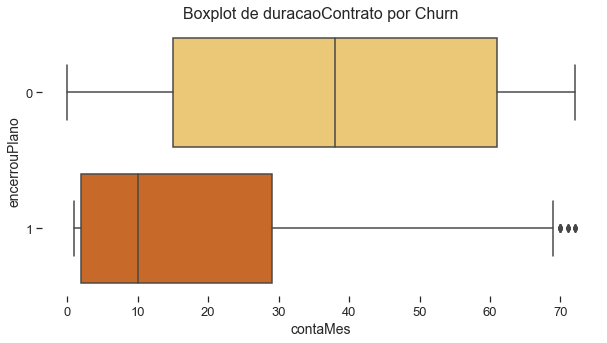

In [92]:
boxplot('duracaoContrato')

Nota-se de que os clientes que estão a mais tempo tendem a permancer com o plano.

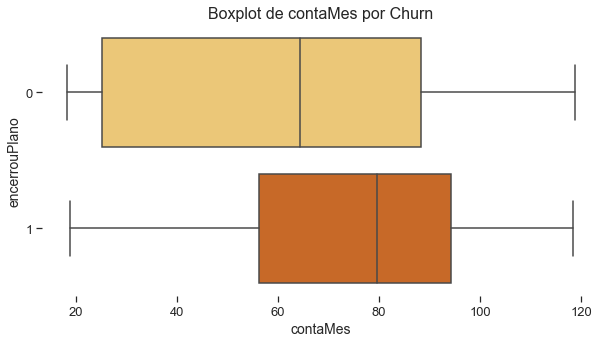

In [93]:
boxplot('contaMes')

Um valor de mensal maior tende que o cliente tenha uma evasão maior do serviço.

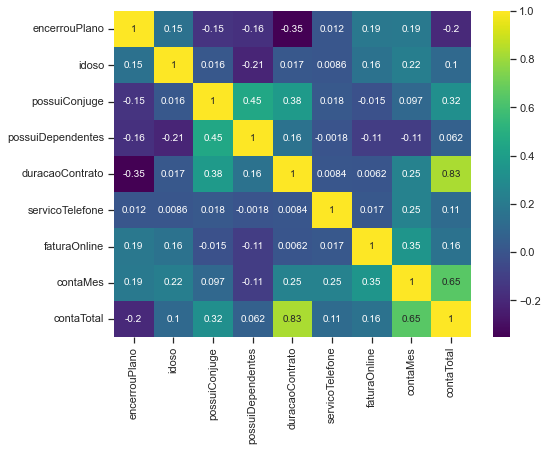

In [95]:
heatmap_corr(df)